# Numerical Integration

In this notebook, we concern ourselves with the evaluation of a **definite** integral, $\displaystyle \int_a^b f(x) \ dx$.

### Evaluating a Definite Integral with the Fundamental Theorem of Calculus (FTC)

We already know that if we can find an antiderivative of $f(x)$, then by the Fundamental Theorem of Calculus, $$ \int_a^b f(x) \ dx = F(b) - F(a), $$ where $F(x)$ is an antiderivative of $f(x)$.

For example, $$ \int_2^5 x^2 \ dx = \left. \frac{x^3}{3} \right|_2^5 = \frac{5^3}{3} - \frac{2^3}{3} = \frac{125-8}{3} = \frac{117}{3}.$$

### Two Situations when the FTC Cannot Be Used

There are two situations when the FTC cannot be used:

1. When $f(x)$ does not have an antiderivative that can be written in terms of elementary functions (or you cannot find the antiderivative because it requires an integration method that you do not (yet) know).  For example, the function $f(x) = \sin(x^2)$ does not have an antiderivative that can be written in terms of elementary functions.  We therefore cannot evaluate the definite integral $$ \int_0^3 \sin(x^2) \ dx$$ using the FTC.  Note that Wolfram Alpha was able to provide an approximate value for the definite integral.  It did this with a numerical integration method not unlike the ones that we learn about in this notebook. 

2. When we do not have an expression for $f(x)$.  For example, consider the following data:
<table style="width:40%">
    <tr>
        <th>Date</th>
        <th>Deaths/day</th>
    </tr>
    <tr>
        <td>March 1</td>
        <td>0.0079</td>
    </tr>
    <tr>
        <td>March 15</td>
        <td>0.0638</td>
    </tr>
    <tr>
        <td>March 29</td>
        <td>0.1944</td>
    </tr>
    <tr>
        <td>April 12</td>
        <td>0.4435</td>
    </tr>
    <tr>
        <td>April 26</td>
        <td>0.5620</td>
    </tr>
    <tr>
        <td>May 10</td>
        <td>0.4630</td>
    </tr>                     
    <tr>
        <td>May 24</td>
        <td>0.2897</td>
    </tr>   
</table>
This table shows the number of people who died from SARS in Singapore at two-week intervals beginning March 1, 2003.  Integrating the (unknown) function of deaths/day as a function of time from March 1 to May 24 gives the total number of people who died from SARS during this period.  If we let $r(t)$ be the death rate (in deaths/day) and $t$ be time (in days), then $$\int_0^{84} r(t) \ dt$$ represents the number of deaths during the 84-day period from March 1 to May 24.

For both of these situations, we can <b>approximate</b> (that is, calculate an estimate of) the definite integral.  To do so, it will be beneficial to recall the definition of the definite integral in terms of the limit of a Riemann sum.

### Review from Calculus I: Definition of the Definite Integral

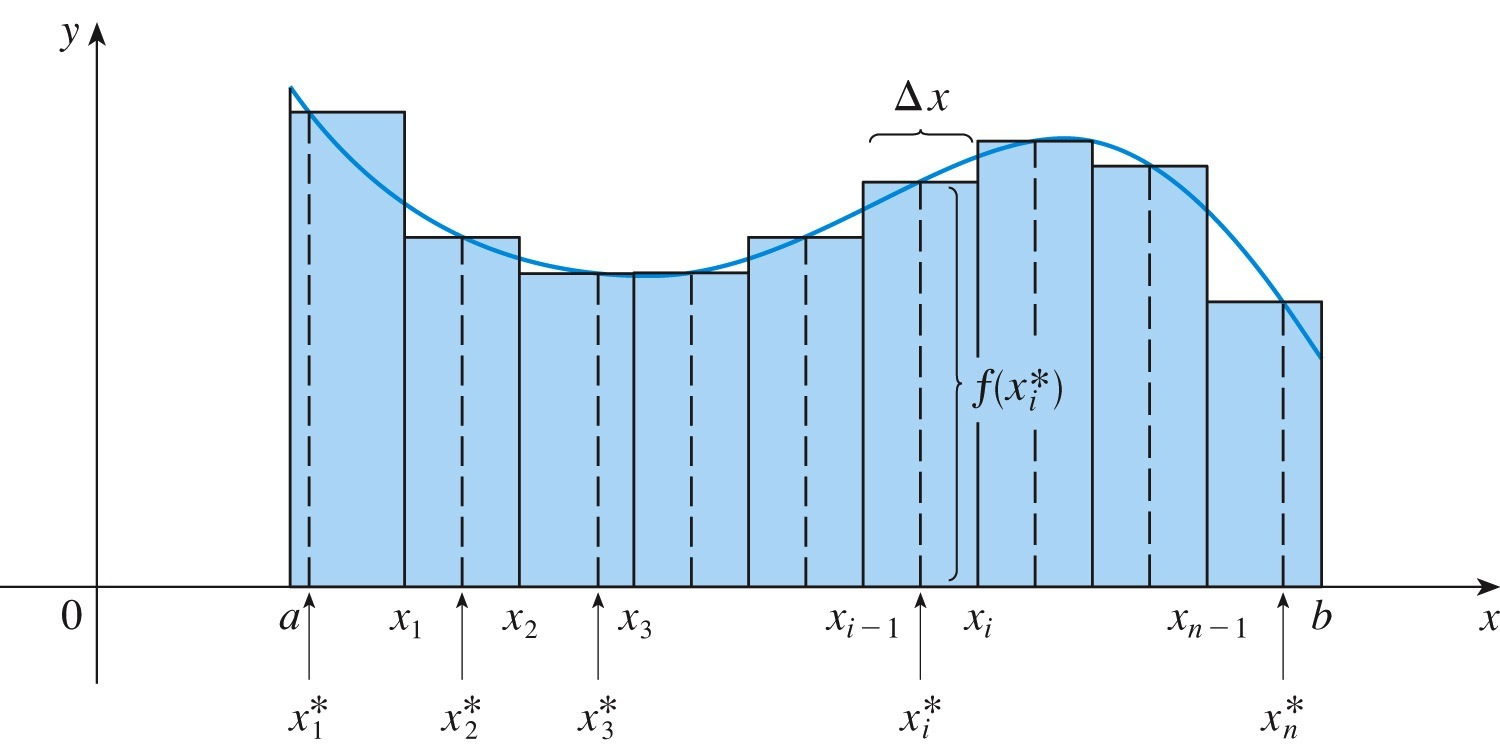

If a function is defined for $a \le x \le b$, we divide the interval $[a,b]$ into $n$ subintervals of equal width $\Delta x = \frac{b-a}{n}$.  We let $x_0 (=a)$, $x_1$, $x_2$, ..., $x_n (=b)$ be the endpoints of these subintervals and we let $x_1^*$, $x_2^*$, ..., $x_n^*$ be any sample points in these subintervals, so $x_i^*$ lies in the $i$th subinterval $[x_{i-1}, x_i]$.  Then the definite integral of $f$ from $a$ to $b$ is 
$$ \int_a^b f(x) \ dx = \lim_{n \to \infty} \sum_{i=1}^n f(x_i^*) \Delta x$$
provided that this limit exists.

Recall that the Riemann sum $\displaystyle \sum_{i=1}^n f(x_i^*) \Delta x$ represents the area of the rectangles shown in the figure.  The width of every rectangle is $\Delta x$, and the height of the $i$th rectangle is $f(x_i^*)$.  If you would like a refresher on this, you may want to watch the following video from MATH 134.

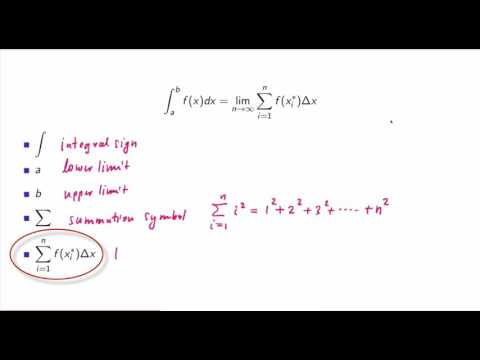

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('3USeI62T6GM')

You likely remember that an <b>exact</b> evaluation of a definite integral using the Riemann sum is a formidable undertaking.  That is because it is necessary to determine the Riemann sum first in terms of $n$ only before being able to evaluate the limit as $n$ goes to infinity.

Luckily, none of this is necessary when we <b>approximate</b> the integral!  In that case, we omit the limit, and choose a 'small' (relative to an infinitely large) value for $n$.

### Right Point Rule and Left Point Rule

In the following video, you will see how omitting the limit readily leads to two numerical integration methods, namely the Right Point Rule and the Left Point Rule, and how those methods can be used to approximate the value of the integral in the example used to illustrate case 2 above.

### Trapezoid Rule

As was mentioned in the video, neither the Right Point Rule nor the Left Point Rule are ideal, because each omits an important data point.  The Right Point Rule does not make use of the first data point, and the Left Point Rule does not make use of the last data point.

In the following video, you will learn about a new numerical method of integration, known as the Trapezoid Rule, that  addresses this shortcoming, and obtain an improved approximation of the value of the integral in the example used to illustrate case 2 above.

In general, we expect the Trapezoid Rule to give more accurate approximations than the Right Point Rule of the Left Point Rule.  There are more sophisticated numerical integration schemes that give even better approximations, but they come at a computational cost.  The Trapezoid Rule is a trusty, low-cost integrator that is suitable for many daily scientific applications.  

Of course, we expect any of the numerical integration schemes to give more accurate approximations as $n$ increases.  For the example used to illustrate case 2 above, $n$ is limited by the number of data points we have available.  But for definite integrals such as the example used to illustrate case 1 above (when we know the function to be integrated), we have a choice, which presents the question:
>How do we choose which $n$ to use?

This is the subject of the following video, where you see how computational power can be harnessed when wanting to use the Trapezoid Rule to approximate the value of the definite integral for a known function.

In the last video, the following Python program was used (Python is a computer programming language).  No worries, there is no need to understand this program!  Just skip to the examples below.

In [37]:
import numpy as np

def trapezoid(f,a,b,n):
# output: trapezoid rule approximation of int_a^b f(x) dx using n equal-width subintervals
# Thanks to Patrick Walls, UBC, https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/
    x = np.linspace(a,b,n+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/n
    T = (dx/2) * np.sum(y_right + y_left)
    return T

You can experiment with the following examples to see how changing $n$, the number of subintervals, affects the approximation.  In each example below:
- Line 1 is a comment.
- Line 2 is used to define the function $f(x)$ to be integrated.
- Line 3 runs the trapezoid program defined above. Note that the trapezoid program is called with 4 arguments, namely $f$, $a$, $b$, and $n$, in that order.  

To change the value of $n$, just edit Line 3, and change the 4th argument to the positive integer of your choice (the program likely will strange or erroneous results if the 4th argument is not a positive integer), and then select "Run" from the menu bar at the top of this window.  See the output change.  
>What do you notice as you increase the value of $n$? 

In [38]:
# Integrate f(x) = sin(x^2) from 0 to 3
f = lambda x : np.sin(x**2)
trapezoid(f,0,3,6)

0.6415128358578669

In [39]:
# Integrate f(x) = 4/(1+x^2) from 0 to 1
f = lambda x : 4/(1 + x**2)
trapezoid(f,0,1,1000)

3.141592486923127

### Summary

Not sure if this is needed?????  Perhaps refer the students to the Summary Sheet on eClass?

### Don't Forget!

Don't forget to return to eClass to complete the pre-class quiz.